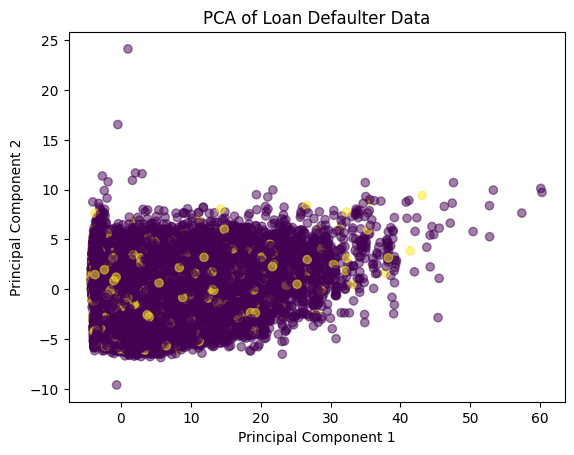

Accuracy: 0.9195974180121295

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.62      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.77      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Загрузим данные
data = pd.read_csv('application_data.csv')

# Предобработка данных
data.fillna(0, inplace=True)

# Кодирование категориальных признаков
label_encoder = LabelEncoder()
data['TARGET'] = label_encoder.fit_transform(data['TARGET'])

# Выбираем только числовые признаки (удаляем категориальные)
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Разделение данных на признаки (X) и целевую переменную (y)
X = numerical_data.drop('TARGET', axis=1)
y = numerical_data['TARGET']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Снижение размерности с использованием PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Визуализация данных
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA of Loan Defaulter Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Обучение модели классификации (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
y_pred = model.predict(X_test_scaled)

# Вывод метрик
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
